<a href="https://colab.research.google.com/github/1Alex98/adult/blob/master/predecir%20si%20los%20ingresos%20de%20un%20adulto%20superar%C3%A1n%20los%2050k%20por%20a%C3%B1o1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as pplt  
import seaborn as sns 
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import statsmodels.api as sm

url = "https://raw.githubusercontent.com/1Alex98/adult/master/adult.csv"
s=requests.get(url).content
salary_dataset=pd.read_csv(io.StringIO(s.decode('utf-8')))
salary_dataset.head(2)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K


In [ ]:
salary_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
salary_dataset.rename(columns={'capital-gain': 'capital gain', 'capital-loss': 'capital loss', 'native-country': 'country','hours-per-week': 'hours per week','marital-status': 'marital'}, inplace=True)
salary_dataset.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital',
       'occupation', 'relationship', 'race', 'gender', 'capital gain',
       'capital loss', 'hours per week', 'country', 'income'],
      dtype='object')

In [ ]:
salary_dataset.isin(['?']).sum(axis=0)

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital               0
occupation         2809
relationship          0
race                  0
gender                0
capital gain          0
capital loss          0
hours per week        0
country             857
income                0
dtype: int64

In [ ]:
salary_dataset['country'] = salary_dataset['country'].replace('?',np.nan)
salary_dataset['workclass'] = salary_dataset['workclass'].replace('?',np.nan)
salary_dataset['occupation'] = salary_dataset['occupation'].replace('?',np.nan)
salary_dataset.dropna(how='any',inplace=True)

In [ ]:
for c in salary_dataset.columns:
    print ("---- %s ---" % c)
    print (salary_dataset[c].value_counts())

---- age ---
36    1283
33    1279
31    1274
35    1272
23    1241
      ... 
85       5
88       5
86       1
87       1
89       1
Name: age, Length: 74, dtype: int64
---- workclass ---
Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64
---- fnlwgt ---
203488    21
125892    18
120277    18
113364    17
126569    17
          ..
88440      1
176517     1
194956     1
201105     1
208174     1
Name: fnlwgt, Length: 26741, dtype: int64
---- education ---
HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
1st-4th           222
Preschool          72
Name: education, dtype: int

In [ ]:
salary_dataset.drop(['educational-num','age', 'hours per week', 'fnlwgt', 'capital gain','capital loss', 'country'], axis=1, inplace=True)

In [ ]:
salary_dataset['income'] = salary_dataset['income'].map({'<=50K': 0, '>50K': 1}).astype(int)

In [ ]:
salary_dataset['gender'] = salary_dataset['gender'].map({'Male': 0, 'Female': 1}).astype(int)

In [ ]:
salary_dataset['race'] = salary_dataset['race'].map({'Black': 0, 'Asian-Pac-Islander': 1, 'Other': 2, 'White': 3, 'Amer-Indian-Eskimo': 4}).astype(int)

In [ ]:
salary_dataset['marital'] = salary_dataset['marital'].map({'Married-spouse-absent': 0, 'Widowed': 1, 'Married-civ-spouse': 2, 'Separated': 3, 'Divorced': 4,'Never-married': 5, 'Married-AF-spouse': 6}).astype(int)

In [ ]:
salary_dataset['workclass'] = salary_dataset['workclass'].map({'Self-emp-inc': 0, 'State-gov': 1,'Federal-gov': 2, 'Without-pay': 3, 'Local-gov': 4,'Private': 5, 'Self-emp-not-inc': 6}).astype(int)

In [ ]:
salary_dataset['education'] = salary_dataset['education'].map({'Some-college': 0, 'Preschool': 1, '5th-6th': 2, 'HS-grad': 3, 'Masters': 4, '12th': 5, '7th-8th': 6, 'Prof-school': 7,'1st-4th': 8, 'Assoc-acdm': 9, 'Doctorate': 10, '11th': 11,'Bachelors': 12, '10th': 13,'Assoc-voc': 14,'9th': 15}).astype(int)

In [ ]:
salary_dataset['relationship'] = salary_dataset['relationship'].map({'Not-in-family': 0, 'Wife': 1, 'Other-relative': 2, 'Unmarried': 3,'Husband': 4,'Own-child': 5}).astype(int)

In [ ]:
salary_dataset['occupation'] = salary_dataset['occupation'].map({ 'Farming-fishing': 1, 'Tech-support': 2, 'Adm-clerical': 3, 'Handlers-cleaners': 4, 
 'Prof-specialty': 5,'Machine-op-inspct': 6, 'Exec-managerial': 7,'Priv-house-serv': 8,'Craft-repair': 9,'Sales': 10, 'Transport-moving': 11,
 'Armed-Forces': 12, 'Other-service': 13,'Protective-serv':14}).astype(int)

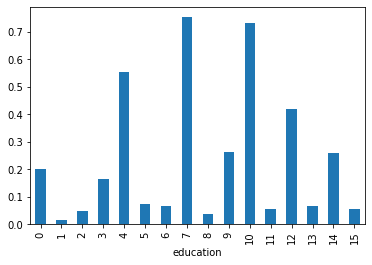

In [ ]:
salary_dataset.groupby('education').income.mean().plot(kind='bar')

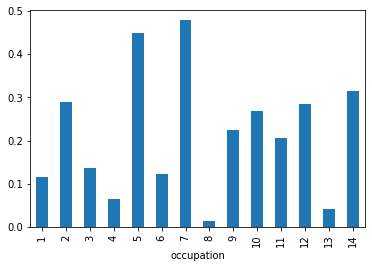

In [ ]:
salary_dataset.groupby('occupation').income.mean().plot(kind='bar')

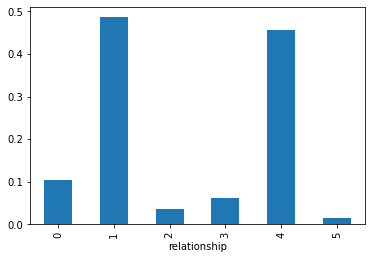

In [ ]:
salary_dataset.groupby('relationship').income.mean().plot(kind='bar')

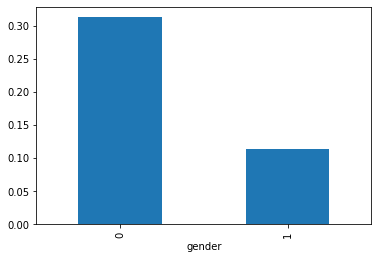

In [ ]:
salary_dataset.groupby('gender').income.mean().plot(kind='bar')

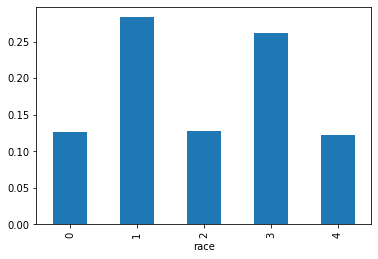

In [ ]:
salary_dataset.groupby('race').income.mean().plot(kind='bar')

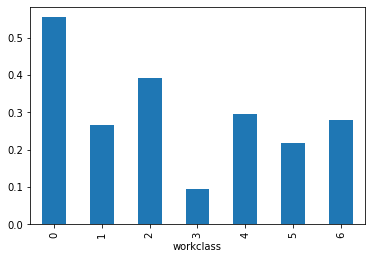

In [ ]:
salary_dataset.groupby('workclass').income.mean().plot(kind='bar')

In [ ]:
salary_dataset_x = pd.DataFrame(np.c_[salary_dataset['relationship'], salary_dataset['education'], salary_dataset['race'],salary_dataset['occupation'],salary_dataset['gender'],salary_dataset['marital'],salary_dataset['workclass']], columns = ['relationship','education','race','occupation','gender','marital','workclass'])

In [ ]:
salary_dataset_y = pd.DataFrame(salary_dataset.income)

In [ ]:
reg = LogisticRegression()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(salary_dataset_x, salary_dataset_y, test_size=0.33, random_state=42)

In [ ]:
reg.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = reg.predict(x_test)

In [ ]:
reg.predict([[1,7,3,7,0,2,0]])

array([1])

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7603189493433395
